In [2]:
import pandas as pd
import numpy as np
import pyfolio as pf
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline


nifty_list = pd.read_csv('ind_nifty50list.csv')
nifty_list

C:\Users\Kushal\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


,Company Name,Industry,Symbol,Series,ISIN Code,ROE
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042,16.30
1,Ambuja Cements Ltd.,CEMENT & CEMENT PRODUCTS,AMBUJACEM,EQ,INE742F01042,10.00
2,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026,22.70
3,Aurobindo Pharma Ltd.,Pharma,AUROPHARMA,EQ,INE021A01026,20.00
4,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034,7.00
5,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010,21.20
6,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024,19.90
7,Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011,19.40
8,Bharti Airtel Ltd.,TELECOM,BHARTIARTL,EQ,INE397D01024,0.60
9,Indus Towers Ltd,TELECOM,INDUSTOWER,EQ,INE121J01017,17.20


In [3]:
data = pd.read_csv('nifty_stocks_prices.csv',index_col=0)
data.index = pd.to_datetime(data.index)
data

,ADANIPORTS,AMBUJACEM,ASIANPAINT,AUROPHARMA,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BPCL,BHARTIARTL,INDUSTOWER,...,TATAMOTORS,TATASTEEL,TECHM,UPL,ULTRACEMCO,VEDL,WIPRO,YESBANK,ZEEL,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,130.765060,165.358368,410.496002,91.091522,258.072052,1632.926514,127.571526,70.324585,280.519104,130.320923,...,309.819305,15.025709,188.703079,78.634361,1952.255615,86.955521,135.695404,87.243210,207.493668,NaN
2013-01-02,131.381866,167.365906,405.753418,94.976280,262.645660,1686.811157,126.169807,72.327934,279.604706,132.792252,...,311.041962,15.023992,189.925858,78.218636,1964.271362,88.838242,134.618393,89.227669,214.739899,5993.250000
2013-01-03,131.239548,169.168655,408.050446,95.211716,263.232697,1696.500244,129.566666,72.288467,285.657471,134.670486,...,311.139771,15.166295,190.259354,81.247597,1954.234131,89.494995,136.003067,90.023293,214.786346,6009.500000
2013-01-04,130.480377,168.881897,408.542419,94.952721,261.149536,1689.377197,129.627396,73.818108,284.786530,136.515717,...,308.498840,14.864547,190.491791,80.713058,1970.689697,88.312828,138.003128,89.447159,210.930969,6016.149902
2013-01-07,132.900208,167.038177,407.832397,94.929184,259.994293,1682.713379,129.435822,76.087921,284.612366,136.680466,...,306.395905,15.118288,187.369141,81.514870,1969.531250,88.728783,138.447540,91.129837,207.400772,5988.399902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,810.349976,518.400024,3123.699951,440.200012,924.700012,3586.850098,6476.100098,324.100006,803.799988,191.600006,...,391.299988,110.000000,1016.250000,723.549988,7053.799805,304.899994,387.799988,20.150000,239.050003,18122.500000
2022-12-29,819.549988,522.750000,3115.149902,437.149994,934.549988,3568.800049,6510.899902,327.200012,820.750000,189.800003,...,385.899994,111.750000,1013.200012,722.549988,6982.200195,307.100006,390.750000,20.150000,239.250000,18191.000000
2022-12-30,818.099976,524.099976,3087.899902,438.299988,933.750000,3616.050049,6575.200195,330.500000,806.099976,190.449997,...,387.950012,112.650002,1016.400024,716.150024,6959.049805,308.399994,392.750000,20.600000,240.050003,18105.300781


In [4]:
# Calculate the percentage change for each stock
data_pct_change = data.pct_change().dropna()
data_pct_change.tail(3)

,ADANIPORTS,AMBUJACEM,ASIANPAINT,AUROPHARMA,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BPCL,BHARTIARTL,INDUSTOWER,...,TATAMOTORS,TATASTEEL,TECHM,UPL,ULTRACEMCO,VEDL,WIPRO,YESBANK,ZEEL,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-30,-0.001769,0.002582,-0.008748,0.002631,-0.000856,0.013240,0.009876,0.010086,-0.01785,0.003425,...,0.005312,0.008054,0.003158,-0.008857,-0.003316,0.004233,0.005118,0.022333,0.003344,-0.004711
2023-01-02,0.005134,0.004579,-0.013164,-0.007985,0.008407,-0.011643,-0.003262,0.010136,0.00918,-0.002625,...,0.017657,0.058589,-0.006789,0.008169,0.008464,0.024968,0.000764,0.050971,0.012706,0.005090
2023-01-03,-0.002250,0.008452,-0.006235,0.014949,0.021984,0.007765,0.008011,0.008986,0.00504,-0.001316,...,-0.002280,-0.006709,0.014165,-0.003670,-0.003470,0.010914,0.010177,0.018476,-0.012341,0.001929


In [5]:
## calculaion of Beta

def calc_beta(y,x):
    model = sm.OLS(y,x)
    results = model.fit()
    return results.params[0]

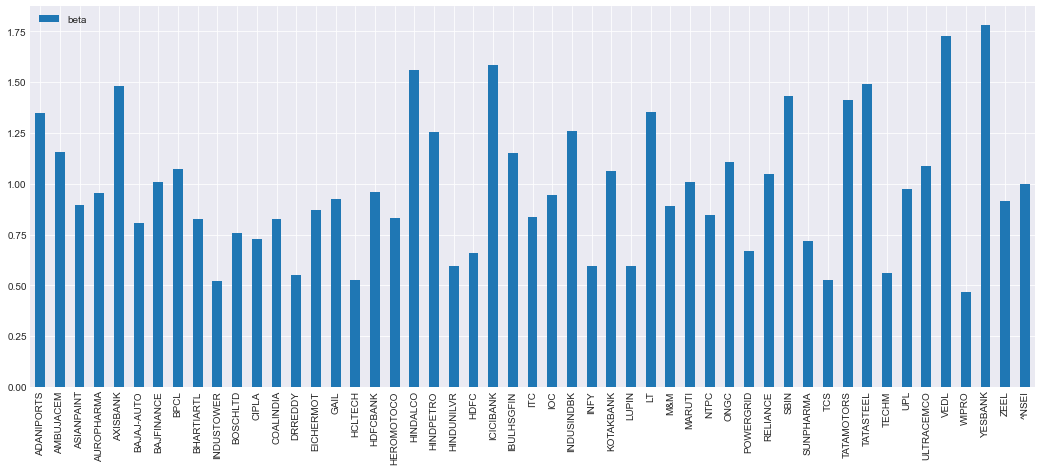

In [6]:
beta = pd.DataFrame(index=[0])
for ticker in data_pct_change.columns:
    beta[ticker] = calc_beta(data_pct_change.loc[:'2017',ticker],data_pct_change.loc[:'2017','^NSEI'])
beta = beta.T
beta.columns = ['beta']

bar_p = beta.plot.bar(figsize=(18,7))

plt.show()

In [7]:
######### Beta < 0.7

low_beta = beta[beta.values < 0.7].index


In [8]:
def plot_performance(stock_list, strategy_name):
    stk_returns = data_pct_change.loc['2018':, stock_list]
    (stk_returns+1).cumprod().plot(figsize=(15,7),legend="left")
    plt.title(strategy_name)
    plt.show()

    nifty = data_pct_change.loc['2018':, '^NSEI']
    portfolio = stk_returns.mean(axis=1)
    plt.title(strategy_name + ' Portfolio Performance')
    (portfolio+1).cumprod().plot(figsize=(15,7),label=strategy_name, color='purple')
    (nifty+1).cumprod().plot(figsize=(15,7),label='Nifty', color='blue')
    plt.legend()
    plt.show()
    return portfolio

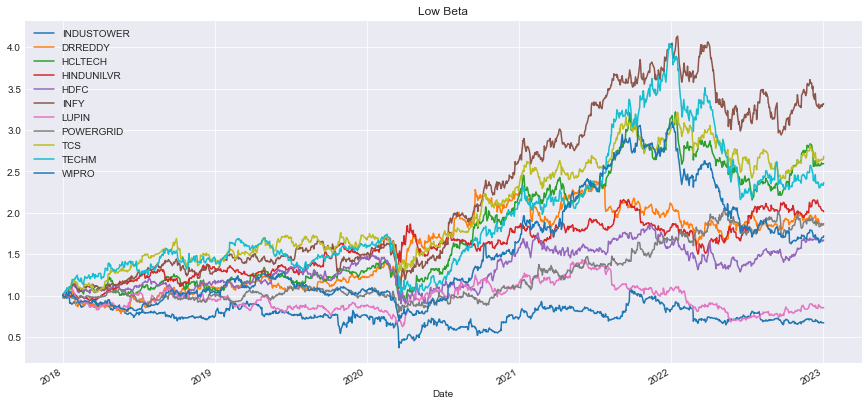

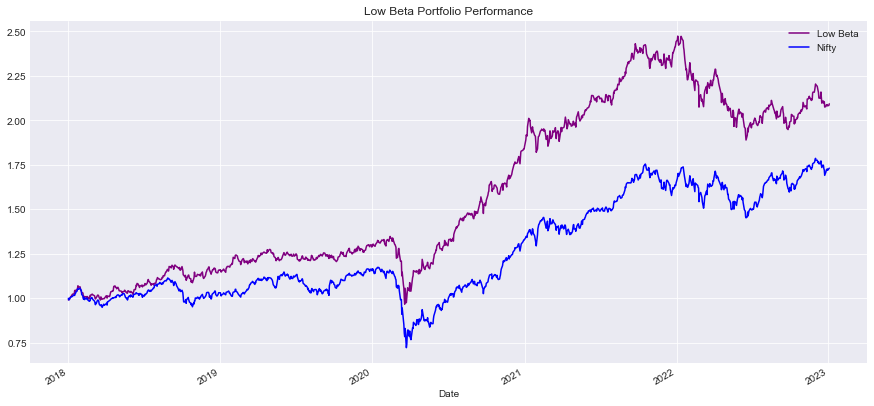

In [9]:
p = plot_performance(low_beta, 'Low Beta')

Start date,2018-01-01
End date,2023-01-03
Total months,58
,Backtest
Annual return,16.2%
Cumulative returns,109.3%
Annual volatility,17.6%
Sharpe ratio,0.94
Calmar ratio,0.57
Stability,0.86
Max drawdown,-28.2%


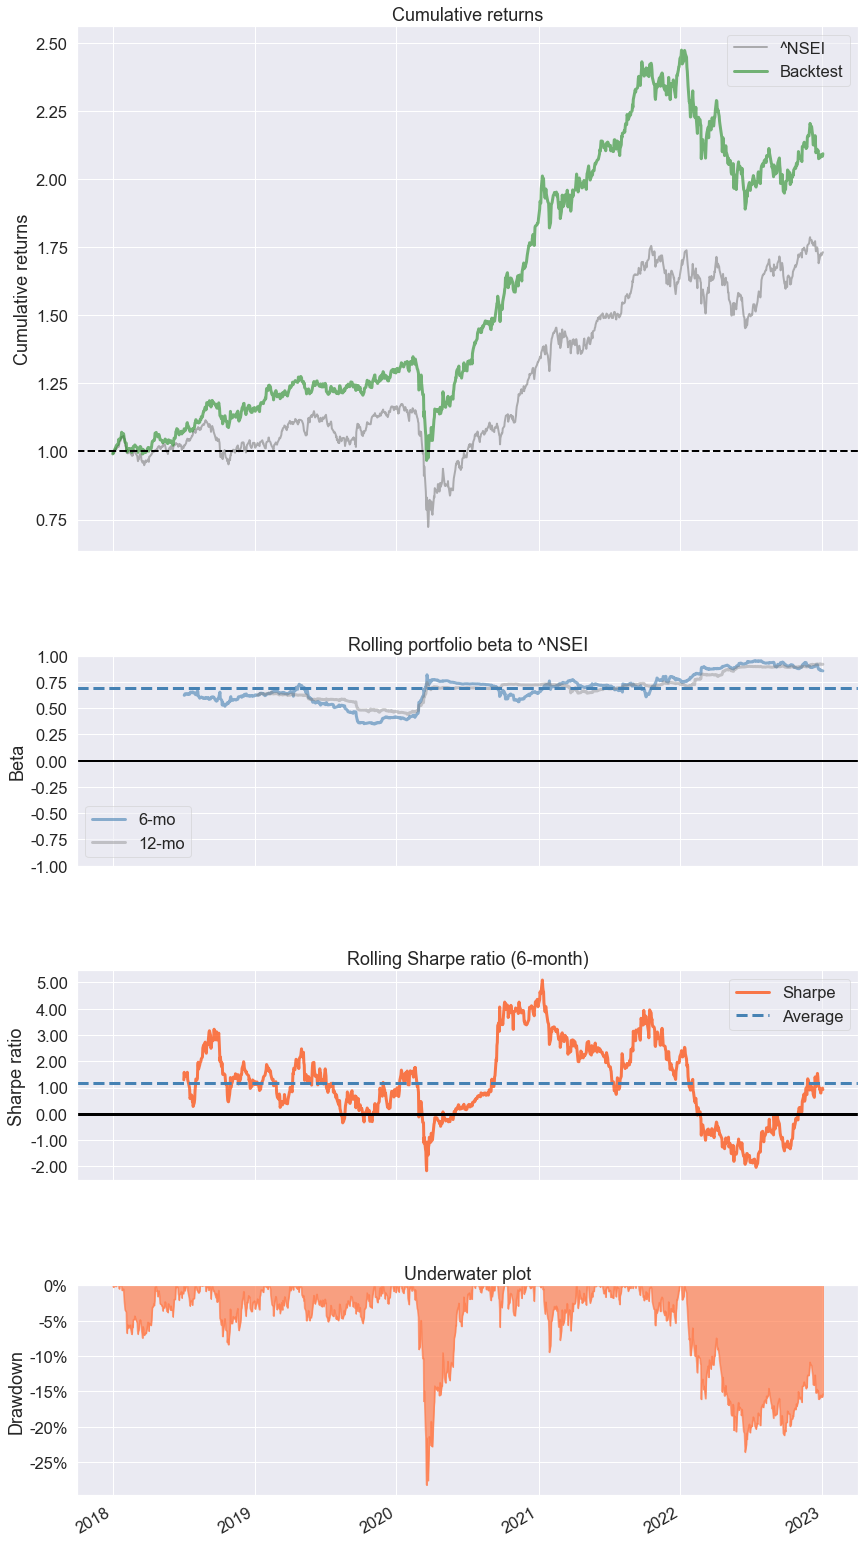

In [10]:
pf.create_simple_tear_sheet(p,benchmark_rets=data_pct_change.loc['2018':, '^NSEI'])

In [ ]:
###############     ROE>18 #############

In [12]:
high_roe = nifty_list[nifty_list.ROE>18].Symbol.values
len(high_roe)

16

In [13]:
filtered_stocks = low_beta & high_roe
filtered_stocks

Index(['HCLTECH', 'HINDUNILVR', 'INFY', 'TCS', 'TECHM'], dtype='object')

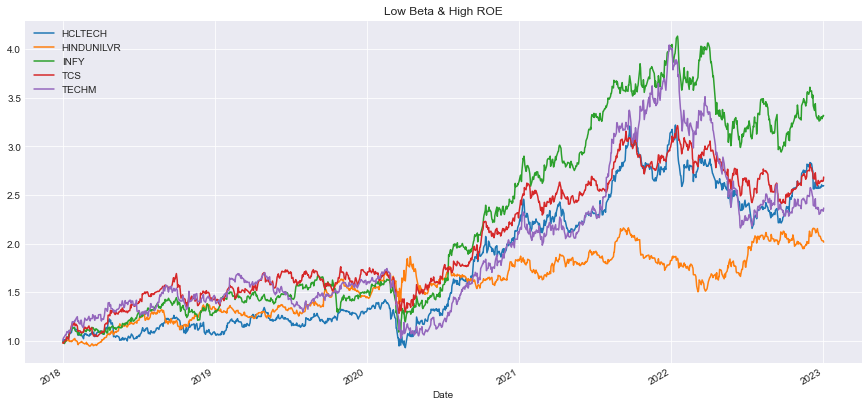

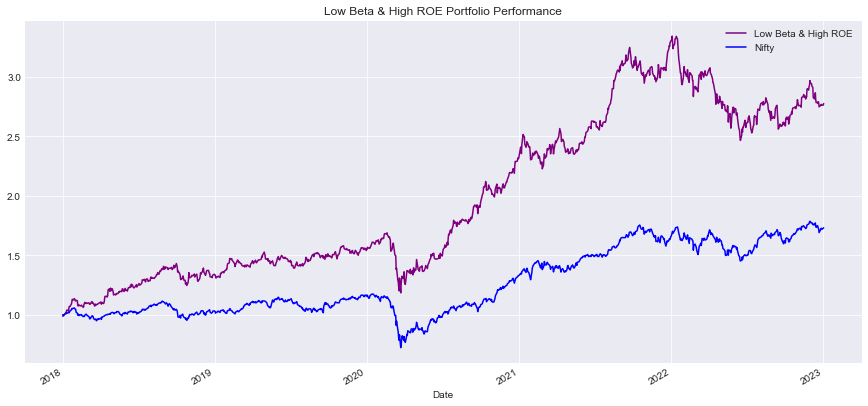

In [14]:
portfolio = plot_performance(filtered_stocks, 'Low Beta & High ROE')

Start date,2018-01-01
End date,2023-01-03
Total months,58
,Backtest
Annual return,23.1%
Cumulative returns,177.7%
Annual volatility,21.4%
Sharpe ratio,1.08
Calmar ratio,0.77
Stability,0.89
Max drawdown,-29.9%


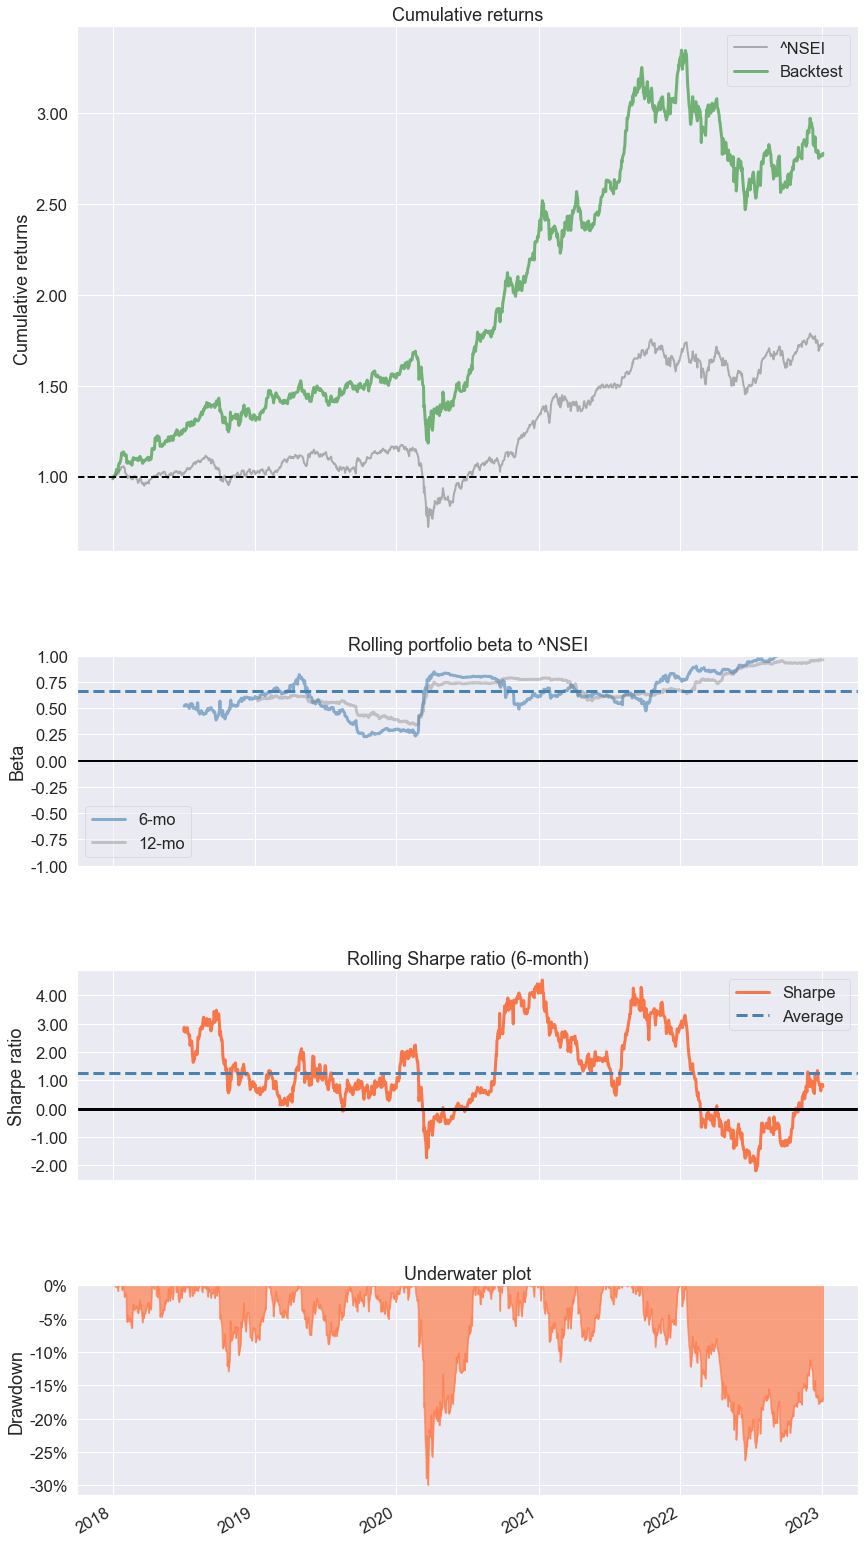

In [13]:
pf.create_simple_tear_sheet(portfolio,benchmark_rets=data_pct_change.loc['2018':, '^NSEI'])